In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [2]:
def bin_ps(y, nb=1000):
    x = np.arange(len(y))
    bins = np.arange(0, len(y), nb)
    inds = np.digitize(x, bins)
    
    bx = np.array([ np.mean(x[inds==i]) for i in range(2,np.max(inds))])
    by = np.array([ np.mean(y[inds==i]) for i in range(2,np.max(inds))])
    return bx, by

In [3]:
map_fac = 1.5587357062607659e14
map_fac_stoch = map_fac * 0.5079853494317075

In [4]:
! ls /tigress/zequnl/xgpaint/radio*

/tigress/zequnl/xgpaint/radio143.0.fits
/tigress/zequnl/xgpaint/radio217.0.fits
/tigress/zequnl/xgpaint/radio30.0.fits
/tigress/zequnl/xgpaint/radio353.0.fits
/tigress/zequnl/xgpaint/radio_stoch_143.0.fits
/tigress/zequnl/xgpaint/radio_stoch_217.0.fits
/tigress/zequnl/xgpaint/radio_stoch_30.0.fits
/tigress/zequnl/xgpaint/radio_stoch_353.0.fits


In [5]:
freq_str = ['30.0', '143.0', '217.0', '353.0']
freqs = [float(f) for f in freq_str]
maps = [hp.read_map(f'/tigress/zequnl/xgpaint/radio{fr}.fits', verbose=False) * map_fac
        for fr in freq_str]
ps_auto = [hp.anafast(m1, iter=0) for m1 in maps]
monos = [ps_[0] for ps_ in ps_auto]

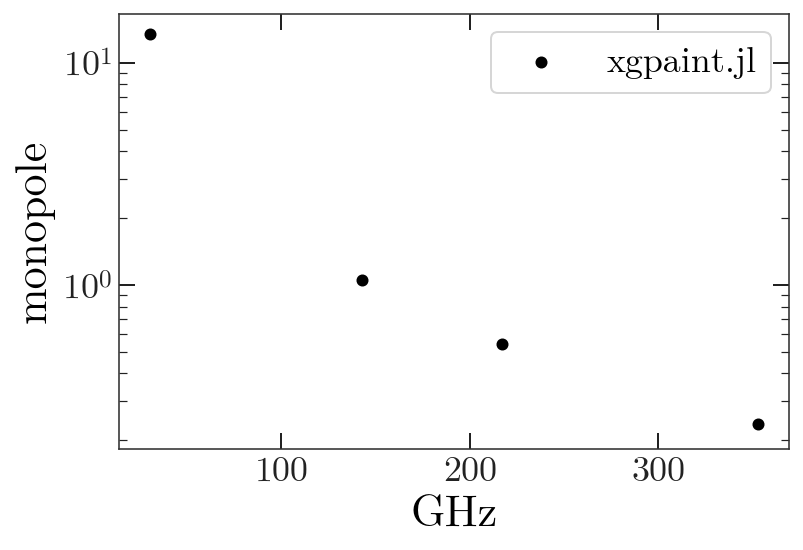

In [6]:
plt.scatter( freqs, monos, label='xgpaint.jl' )

plt.legend()
plt.xlabel('GHz')
plt.ylabel('monopole')
plt.yscale('log')

In [7]:
sehgal_freq_str = ['030', '143', '217', '353']

In [8]:
sehgal_maps = [hp.read_map(
    f'/tigress/zequnl/xgpaint/sehgal/{freq}_rad_pts_healpix_nopell_Nside4096_DeltaT_uK_fluxcut148_7mJy_lininterp.fits')
              for freq in sehgal_freq_str]

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [9]:
sehgal_ps_autos = [hp.anafast(m1, iter=0) for m1 in sehgal_maps]

In [10]:
sehgal_monos = [ps_[0] for ps_ in sehgal_ps_autos]

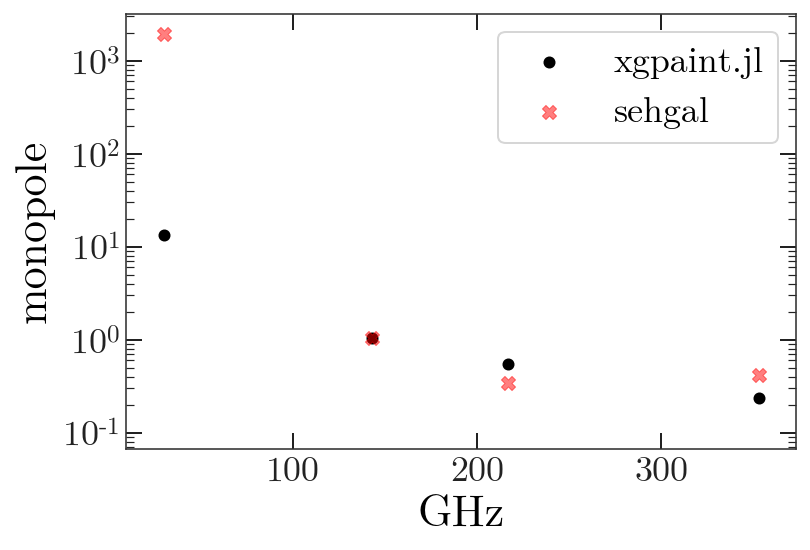

In [11]:
plt.scatter( freqs, monos, label='xgpaint.jl' )
plt.scatter( freqs, sehgal_monos, marker='X', label='sehgal', lw=0.5, s=50, color='r', alpha=0.5 )

plt.legend()
plt.xlabel('GHz')
plt.ylabel('monopole')
plt.yscale('log')

plt.yscale('log')
# plt.ylim(1e-31, 1e-23)

In [12]:
freq_str = ['30.0', '143.0', '217.0', '353.0']
freqs = [float(f) for f in freq_str]
stoch_maps = [hp.read_map(f'/tigress/zequnl/xgpaint/radio_stoch_{fr}.fits', verbose=False) * map_fac_stoch
        for fr in freq_str]
stoch_ps_auto = [hp.anafast(m1, iter=0) for m1 in stoch_maps]
stoch_monos = [ps_[0] for ps_ in stoch_ps_auto]

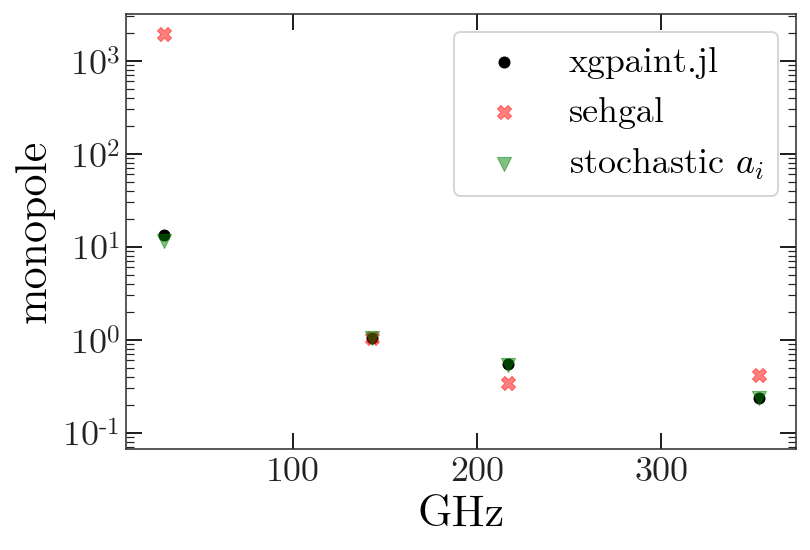

In [29]:
plt.scatter( freqs, monos, label='xgpaint.jl' )
plt.scatter( freqs, sehgal_monos, marker='X', label='sehgal', lw=0.5, s=50, color='r', alpha=0.5 )
plt.scatter( freqs, stoch_monos, marker='v', label='stochastic $a_i$', lw=0.5, s=50, color='g', alpha=0.5 )

plt.legend()
plt.xlabel('GHz')
plt.ylabel('monopole')
plt.yscale('log')

plt.yscale('log')
# plt.ylim(1e-31, 1e-23)

In [32]:
# map_fac = np.sqrt(sehgal_monos[1] / monos[1])
# map_fac_stoch = np.sqrt(sehgal_monos[1] / stoch_monos[1])

In [31]:
np.mean(sehgal_maps[1]), np.mean(maps[1])

(0.29006705930787563, 0.29006705930787763)

In [18]:
ell = np.arange(len(ps_auto[0]))

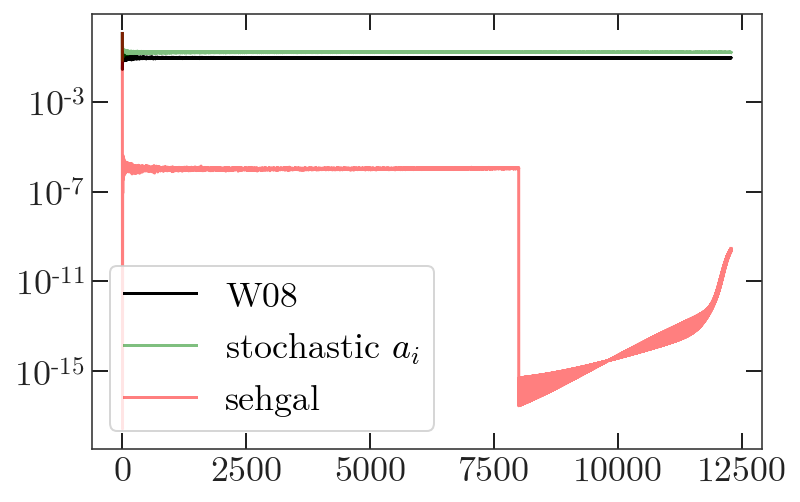

In [37]:

plt.plot(ps_auto[1], 'k-', label='W08')
plt.plot(stoch_ps_auto[1], 'g-', alpha=0.5, label='stochastic $a_i$')
plt.plot(sehgal_ps_autos[1], 'r-', alpha=0.5, label='sehgal')
plt.yscale('log')
plt.legend()

Text(0, 0.5, '$C_{\\ell}$')

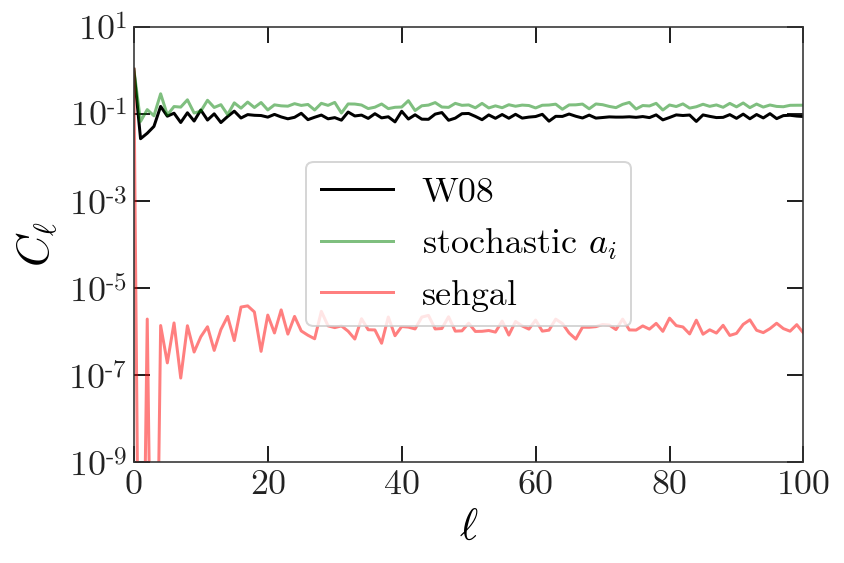

In [45]:

plt.plot(ps_auto[1], 'k-', label='W08')
plt.plot(stoch_ps_auto[1], 'g-', alpha=0.5, label='stochastic $a_i$')
plt.plot(sehgal_ps_autos[1], 'r-', alpha=0.5, label='sehgal')
plt.yscale('log')
plt.legend()
plt.ylim(1e-9,1e1)
plt.xlim(0,100)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')

/home/zequnl/.conda/envs/ps/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/zequnl/.conda/envs/ps/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zequnl/.conda/envs/ps/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


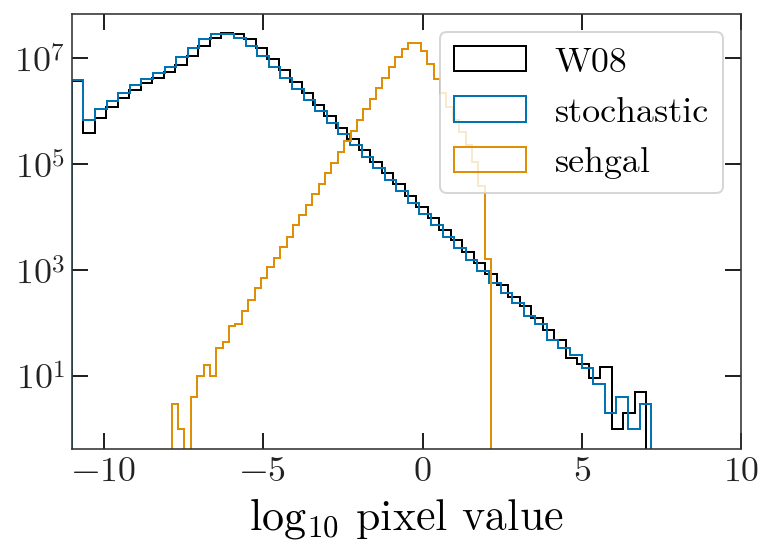

In [57]:
plt.hist( np.log10(maps[1] + 1e-11), bins=50, histtype='step', label='W08' )
plt.hist( np.log10(stoch_maps[1] + 1e-11), bins=50, histtype='step', label='stochastic' )
plt.hist( np.log10(sehgal_maps[1] + 1e-11), bins=50, histtype='step', label='sehgal' )
plt.legend()
plt.xlim(-11, 10)
plt.xlabel('$\log_{10}$ pixel value')
plt.yscale('log')

In [56]:
np.sum(np.isclose(maps[1], 0.0)), np.sum(np.isclose(sehgal_maps[1], 0.0))

(19267351, 2)

In [54]:
np.mean(maps[1])

0.29006705930787763

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/zequnl/.conda/envs/ps/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


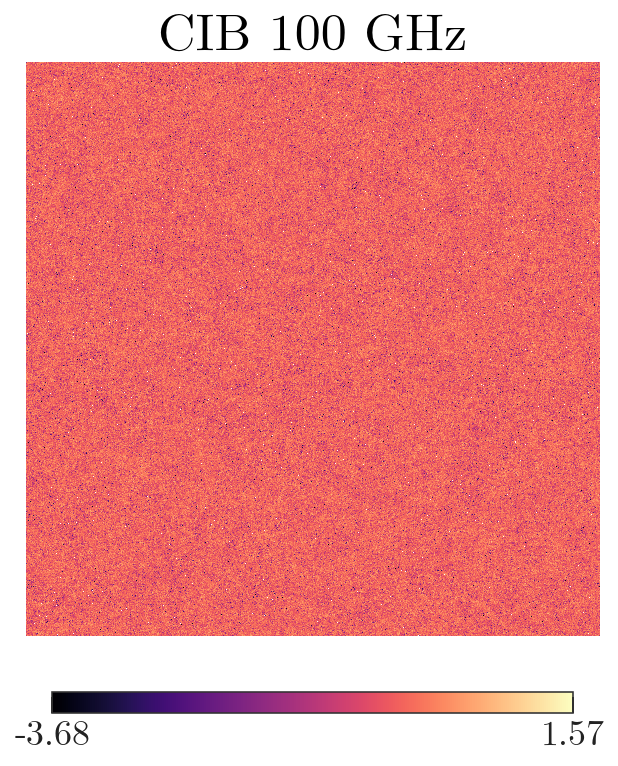

In [57]:
mcib = hp.read_map('/tigress/zequnl/xgpaint/cib100.fits') * 1e9
hp.cartview( np.log10(mcib), lonra=[-10,10], latra=[-10,10],
            title="CIB 100 GHz" )

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/zequnl/.conda/envs/ps/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


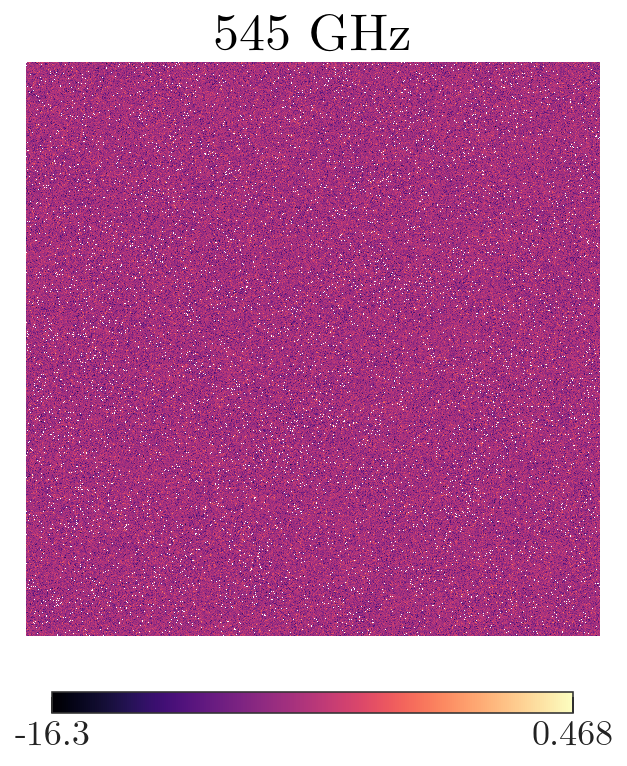

In [59]:
m545 = hp.read_map('/tigress/zequnl/xgpaint/radio545.fits') / 1e25
hp.cartview( np.log10(m545), lonra=[-10,10], latra=[-10,10],
            title="545 GHz" )

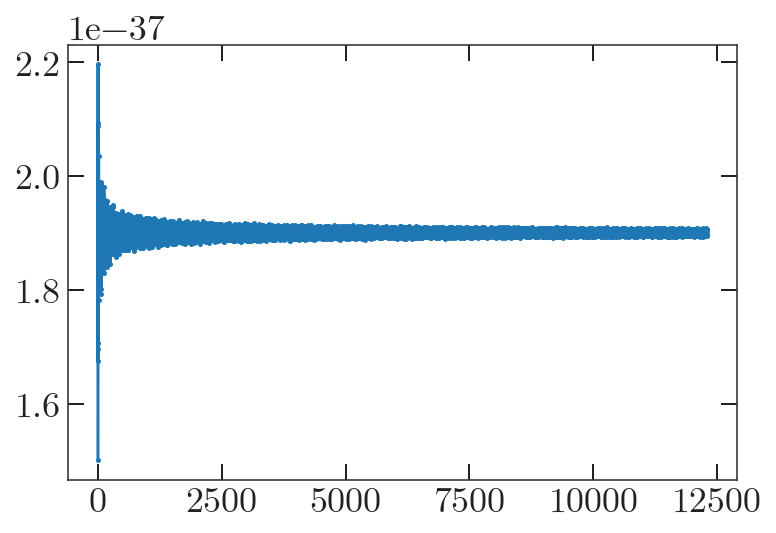

In [60]:
ps = hp.anafast(m545 / 1e17, iter=0)
clxg = ps[2:]
ell = np.arange(2,len(ps))
plt.plot(ell, clxg)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


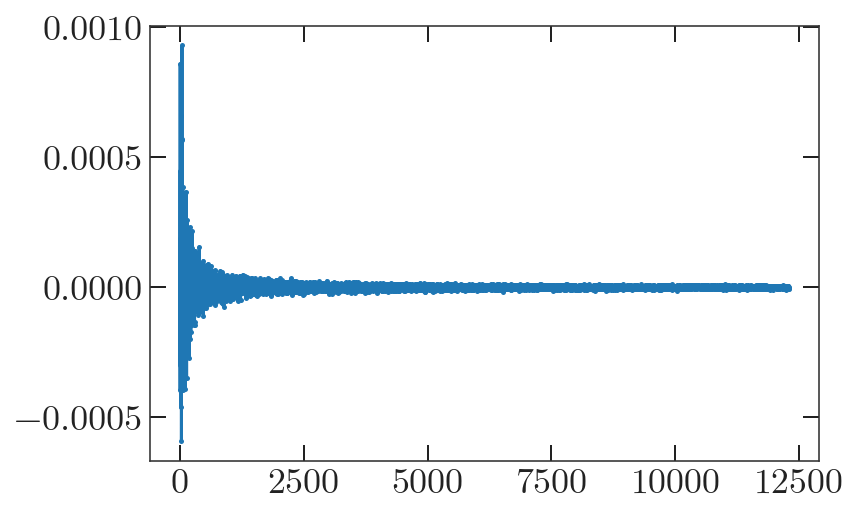

In [64]:
mcib = hp.read_map('/tigress/zequnl/xgpaint/cib100.fits')
m545 = hp.read_map('/tigress/zequnl/xgpaint/radio545.fits')

ps = hp.anafast(m545 / np.mean(m545), mcib / np.mean(mcib), iter=0)
clxg = ps[2:]
ell = np.arange(2,len(ps))
plt.plot(ell, clxg )

In [1]:
rad = hp.read_map('/tigress/zequnl/xgpaint/sehgal/100_rad_pts_healpix_nopell_Nside4096_DeltaT_uK_fluxcut148_7mJy_lininterp.fits')

ps_sehgal = hp.anafast(rad, iter=0)
cl_sehgal = ps_sehgal[2:]
ell = np.arange(2,len(ps_sehgal))

NameError: name 'hp' is not defined

In [7]:
ps_sehgal = hp.anafast(ms, iter=0)
cl_sehgal = ps_sehgal[2:]
ell = np.arange(2,len(ps_sehgal))

Text(0.5, 0, '$\\ell$')

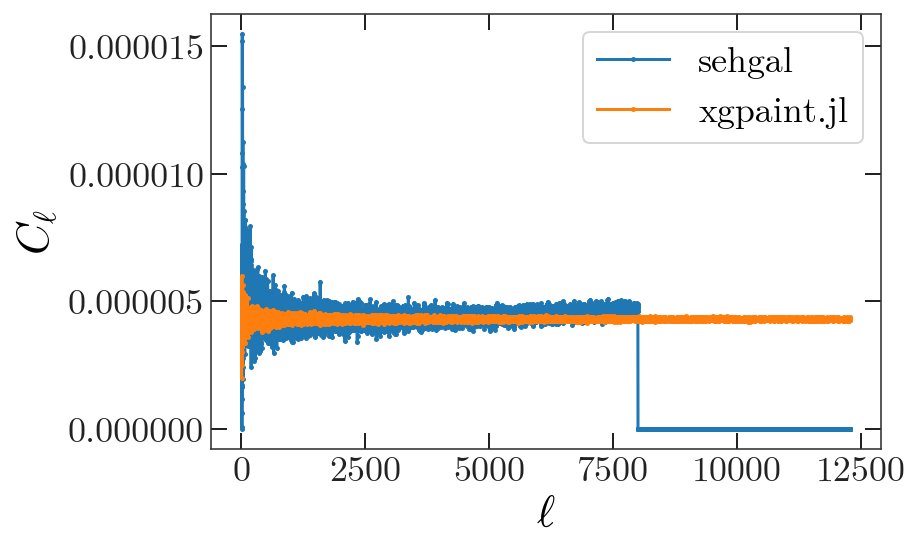

In [17]:
plt.plot(ell, cl_sehgal, label="sehgal")
plt.plot(ell, clxg / 0.5e50, label="xgpaint.jl")
plt.legend()
plt.ylabel(r'$C_{\ell}$')
plt.xlabel(r'$\ell$')

# plt.yscale('log')